In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('C:/Users/Raghav Singh/Desktop/Covid_19_Data_Analysis/covid_19_data.csv')

FileNotFoundError: [Errno 2] File C:/Users/Raghav Singh/Desktop/covid_19_data.csv does not exist: 'C:/Users/Raghav Singh/Desktop/covid_19_data.csv'

In [37]:
df.head(20)

SNo ObservationDate  Province/State  Country/Region      Last Update  \
0     1      01/22/2020           Anhui  Mainland China  1/22/2020 17:00   
1     2      01/22/2020         Beijing  Mainland China  1/22/2020 17:00   
2     3      01/22/2020       Chongqing  Mainland China  1/22/2020 17:00   
3     4      01/22/2020          Fujian  Mainland China  1/22/2020 17:00   
4     5      01/22/2020           Gansu  Mainland China  1/22/2020 17:00   
5     6      01/22/2020       Guangdong  Mainland China  1/22/2020 17:00   
6     7      01/22/2020         Guangxi  Mainland China  1/22/2020 17:00   
7     8      01/22/2020         Guizhou  Mainland China  1/22/2020 17:00   
8     9      01/22/2020          Hainan  Mainland China  1/22/2020 17:00   
9    10      01/22/2020           Hebei  Mainland China  1/22/2020 17:00   
10   11      01/22/2020    Heilongjiang  Mainland China  1/22/2020 17:00   
11   12      01/22/2020           Henan  Mainland China  1/22/2020 17:00   
12   13      01/22/2020       Hong Kong       Hong Kong  1/22/2020 17:00   
13   14      01/22/2020           Hubei  Mainland China  1/22/2020 17:00   
14   15      01/22/2020           Hunan  Mainland China  1/22/2020 17:00   
15   16      01/22/2020  Inner Mongolia  Mainland China  1/22/2020 17:00   
16   17      01/22/2020         Jiangsu  Mainland China  1/22/2020 17:00   
17   18      01/22/2020         Jiangxi  Mainland China  1/22/2020 17:00   
18   19      01/22/2020           Jilin  Mainland China  1/22/2020 17:00   
19   20      01/22/2020        Liaoning  Mainland China  1/22/2020 17:00   

    Confirmed  Deaths  Recovered  
0         1.0     0.0        0.0  
1        14.0     0.0        0.0  
2         6.0     0.0        0.0  
3         1.0     0.0        0.0  
4         0.0     0.0        0.0  
5        26.0     0.0        0.0  
6         2.0     0.0        0.0  
7         1.0     0.0        0.0  
8         4.0     0.0        0.0  
9         1.0     0.0        0.0  
10        0.0     0.0        0.0  
11        5.0     0.0        0.0  
12        0.0     0.0        0.0  
13      444.0    17.0       28.0  
14        4.0     0.0        0.0  
15        0.0     0.0        0.0  
16        1.0     0.0        0.0  
17        2.0     0.0        0.0  
18        0.0     0.0        0.0  
19        2.0     0.0        0.0

In [1]:
df.drop(['SNO','LastUpdate'],axis=1,inplace=True)
df.rename(columns={'Country/Region':'Country','ObservationDate':'Date','State/Province':'State','Country/Region':'Country'},inplace=True)

NameError: name 'df' is not defined

In [41]:
df['Date'] = pd.to_datetime(df['Date'])

In [42]:
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

TypeError: invalid type promotion

In [43]:
df3 = df2.groupby(['Country','Active'])[['Country','Active','Confirmed','Deaths','Recovered']].sum().reset_index()

In [44]:
df3.head(20)

Country  Active  Confirmed  Deaths  Recovered
0           Afghanistan   19368      27878     548       7962
1               Albania     682       1838      42       1114
2               Algeria    2483      11504     825       8196
3               Andorra      11        855      52        792
4                Angola      98        172       8         66
5   Antigua and Barbuda       1         26       3         22
6             Argentina   26740      39570     979      11851
7               Armenia   10572      19157     319       8266
8             Australia     428       7411     102       6881
9               Austria     442      17271     688      16141
10           Azerbaijan    5299      11767     143       6325
11              Bahamas      19        104      11         74
12              Bahrain    5572      20916      57      15287
13           Bangladesh   61202     105535    1388      42945
14             Barbados       5         97       7         85
15              Belarus   21721      57333     337      35275
16              Belgium   34030      60476    9695      16751
17               Belize       3         22       2         17
18                Benin     392        650      11        247
19               Bhutan      40         68       0         28

In [45]:
countries = df3['Country'].unique()
len(countries)

187

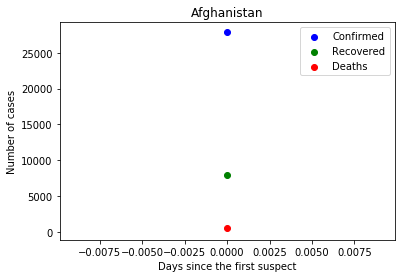

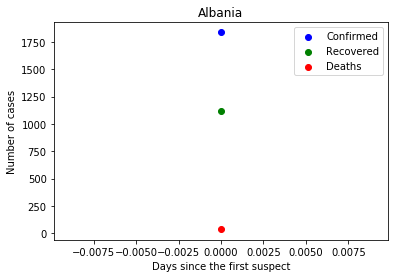

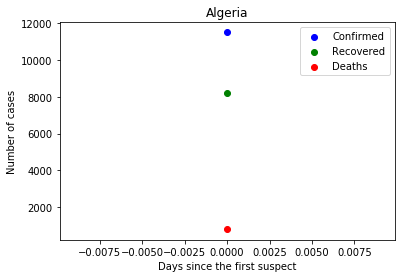

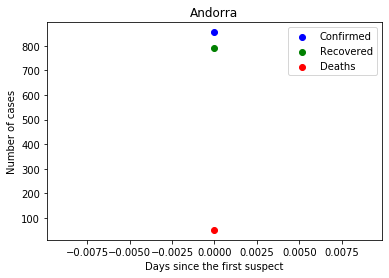

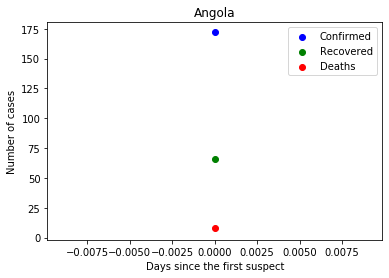

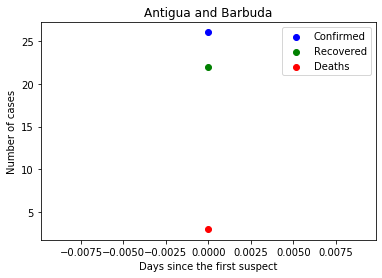

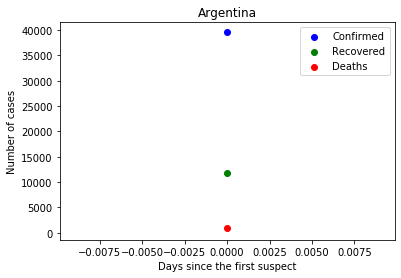

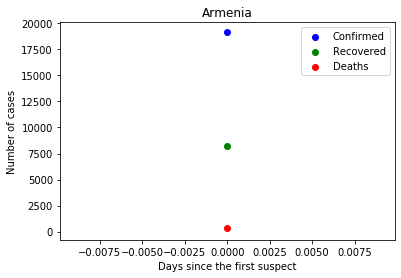

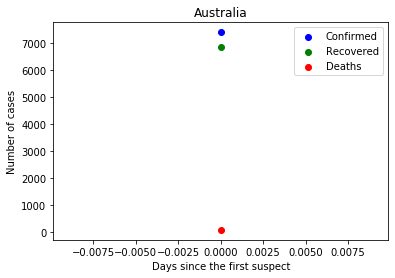

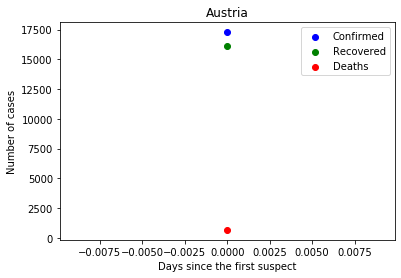

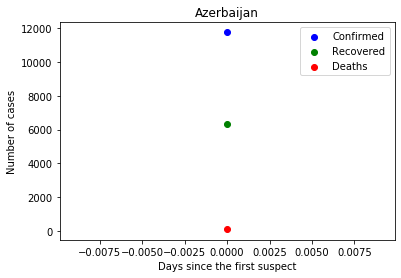

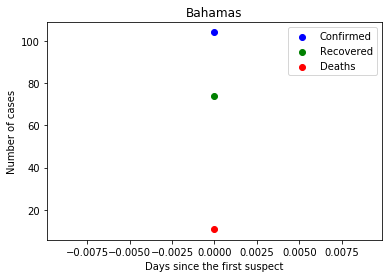

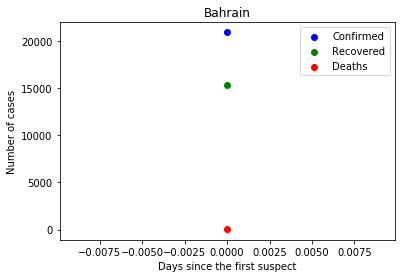

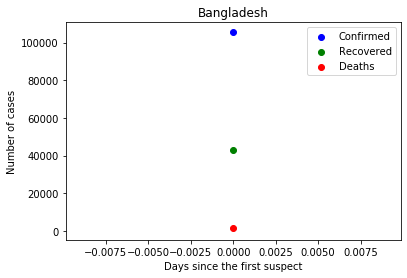

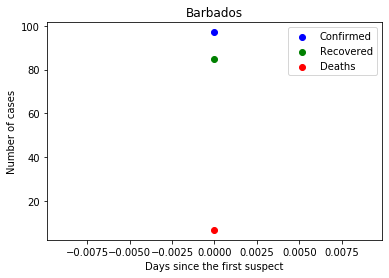

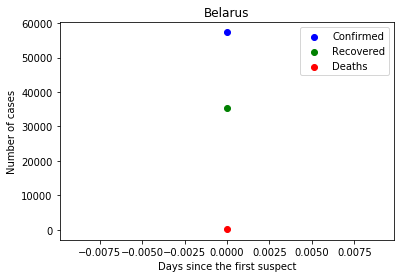

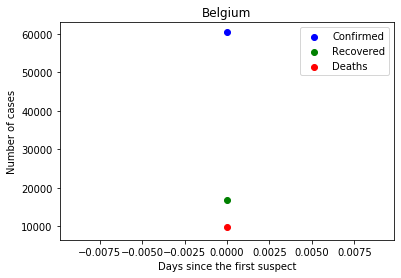

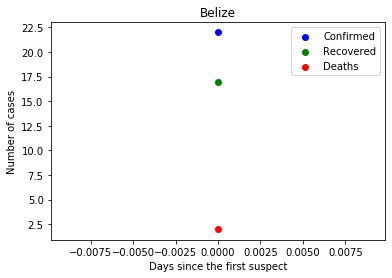

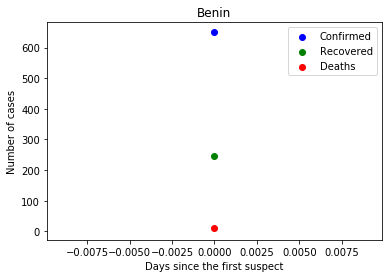

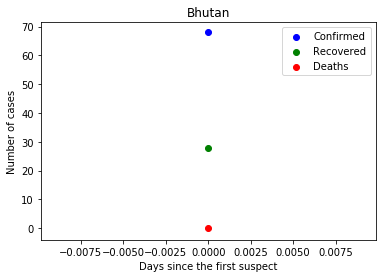

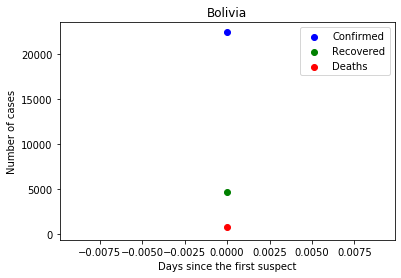

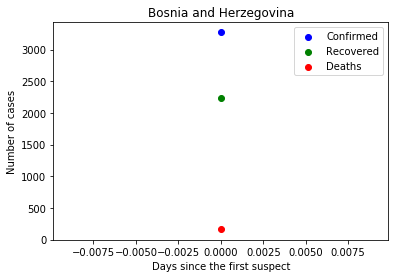

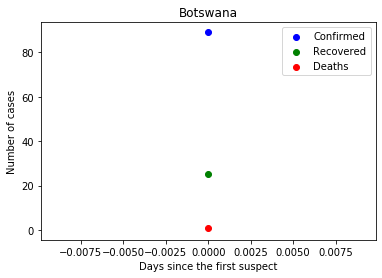

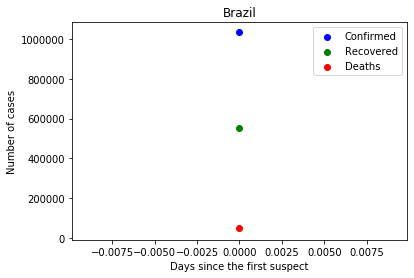

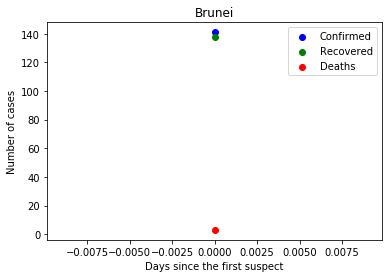

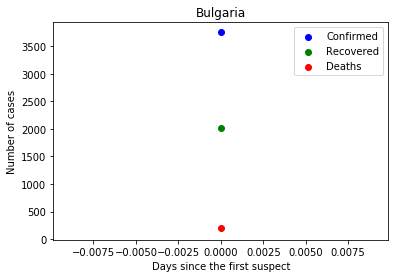

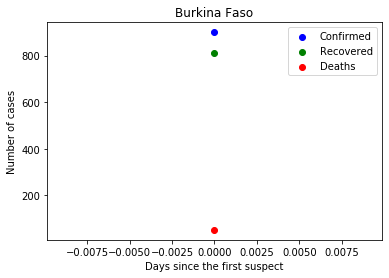

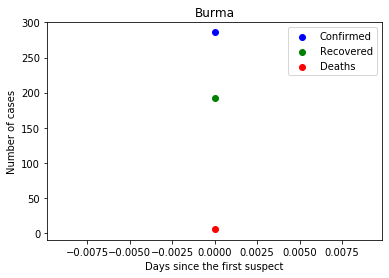

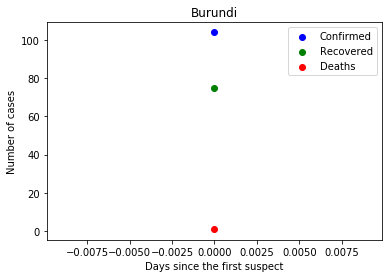

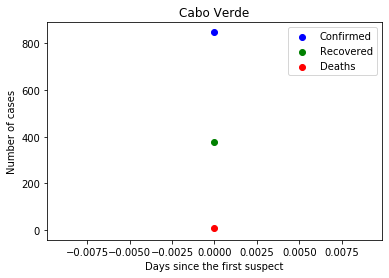

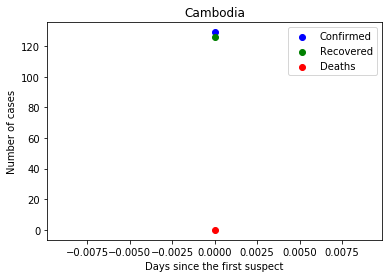

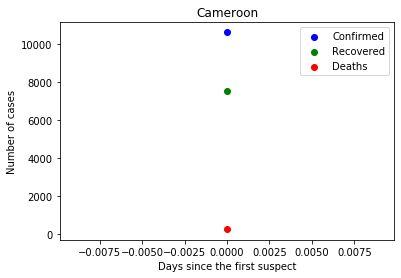

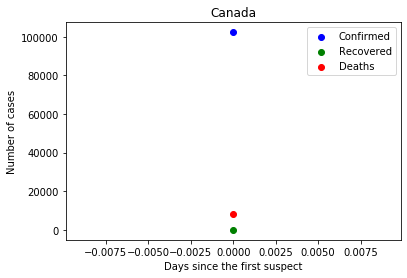

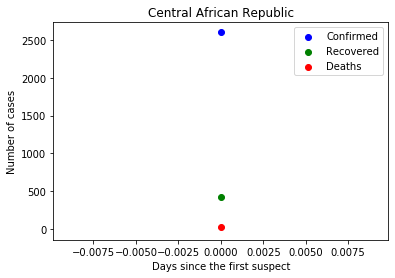

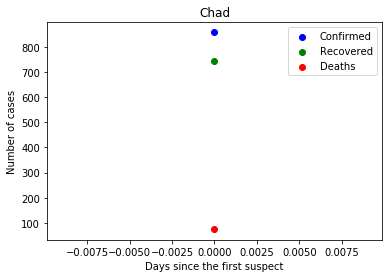

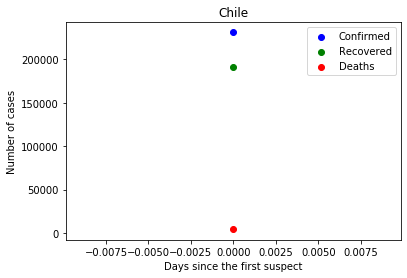

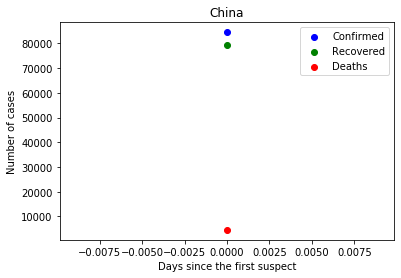

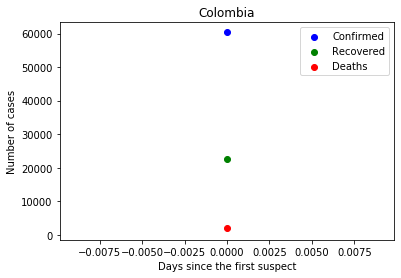

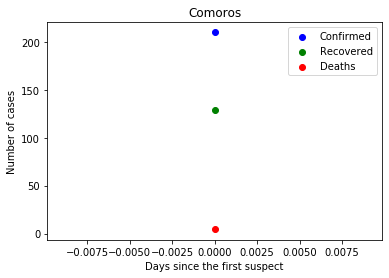

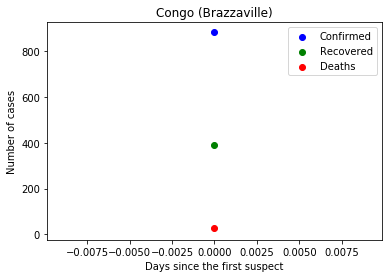

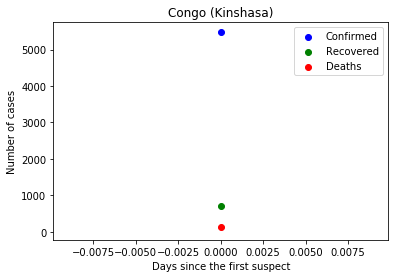

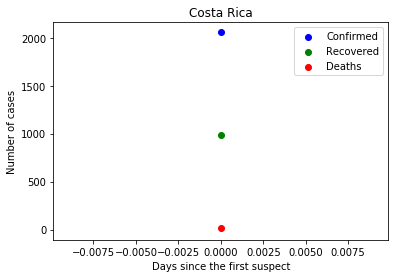

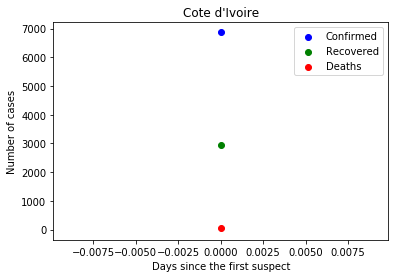

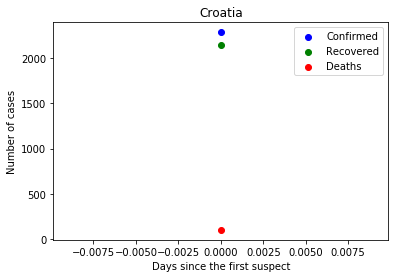

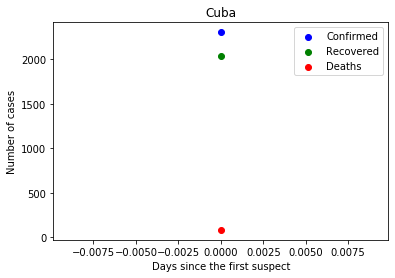

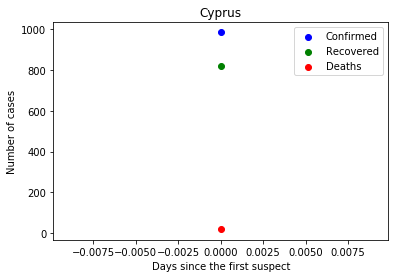

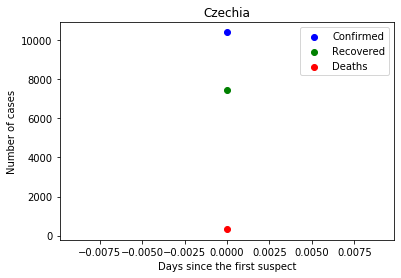

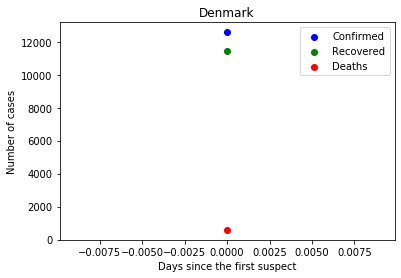

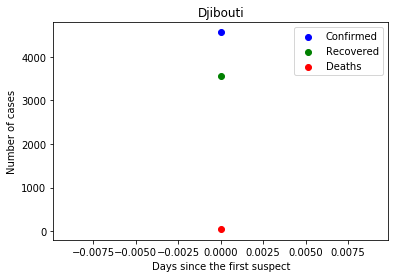

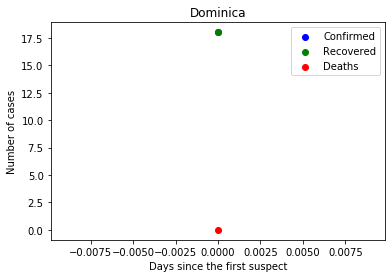

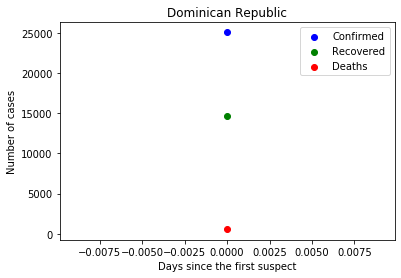

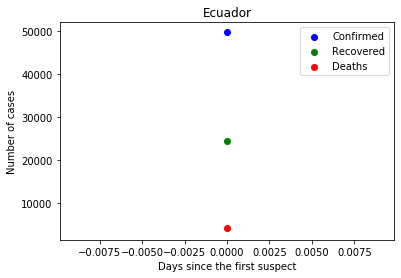

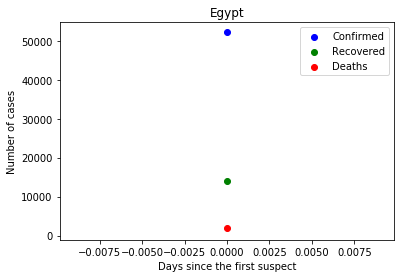

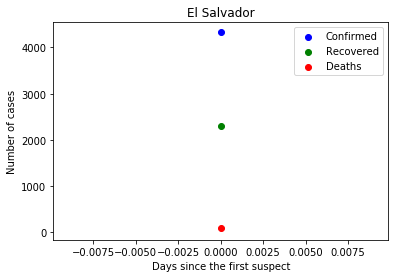

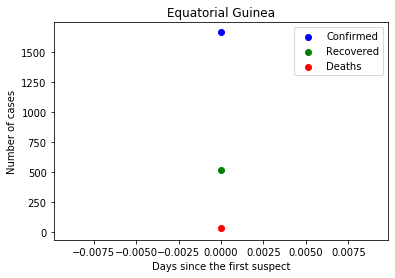

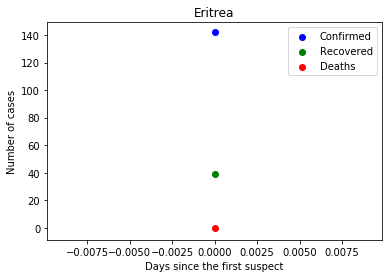

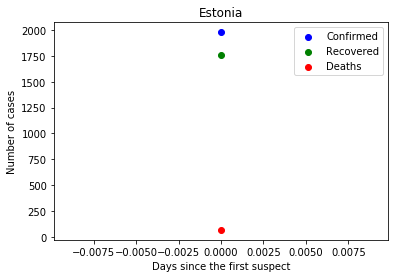

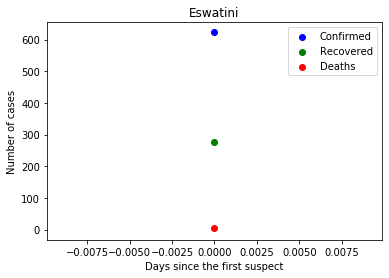

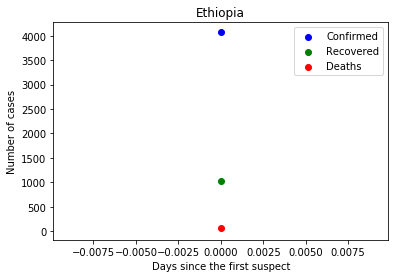

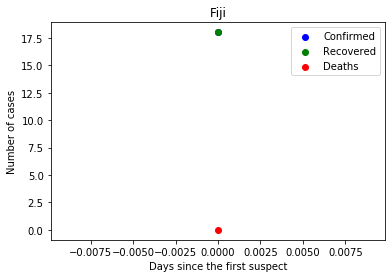

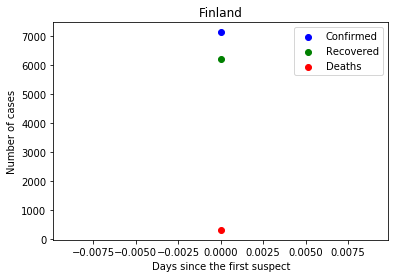

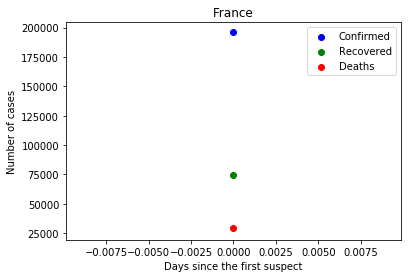

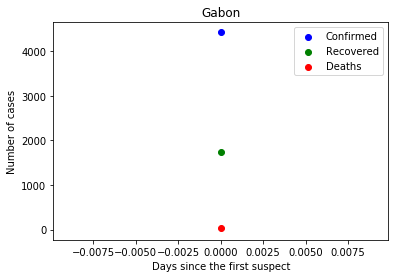

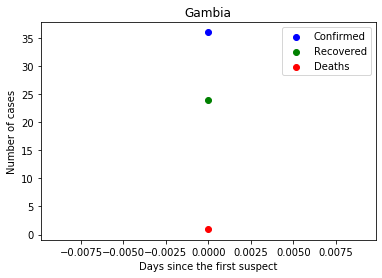

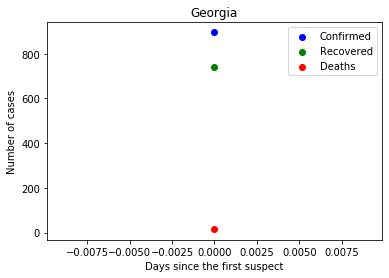

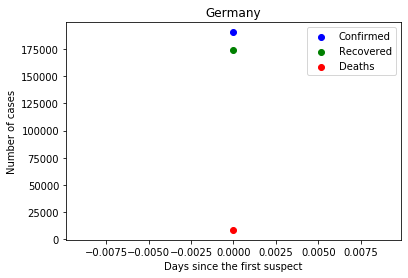

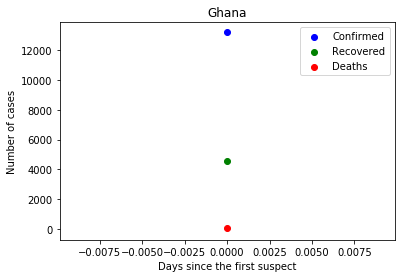

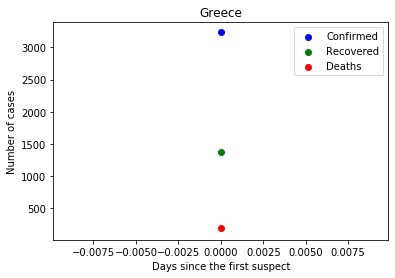

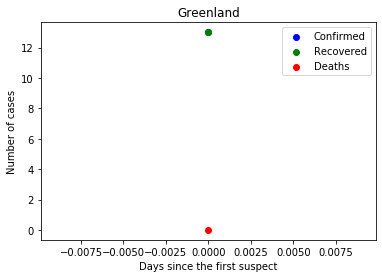

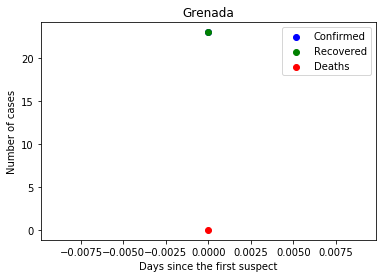

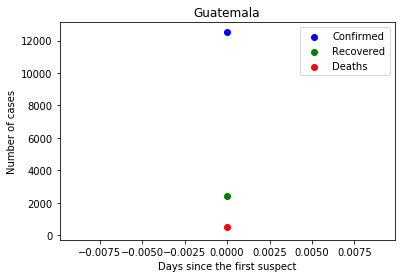

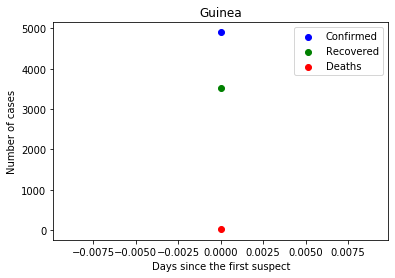

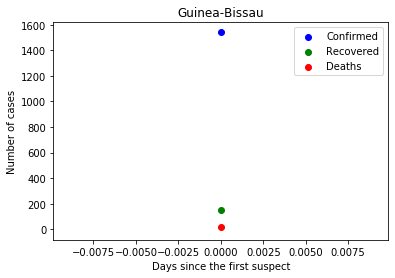

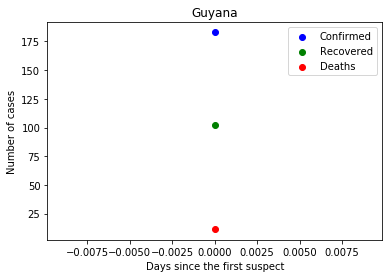

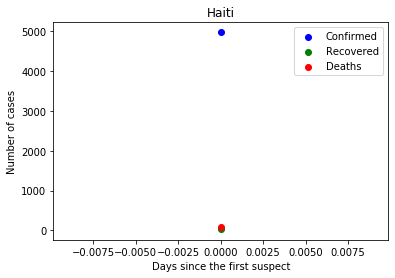

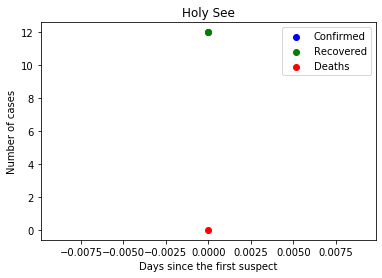

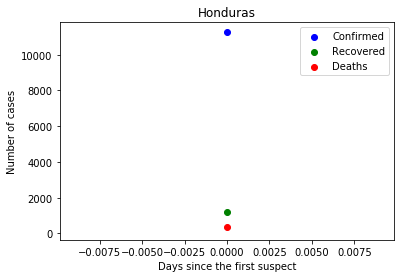

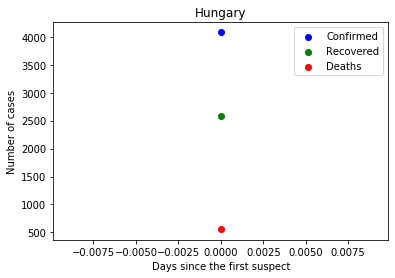

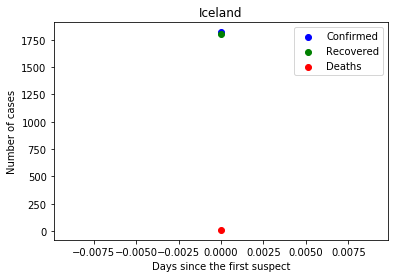

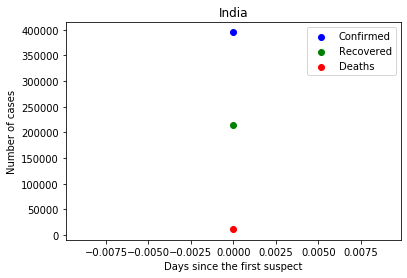

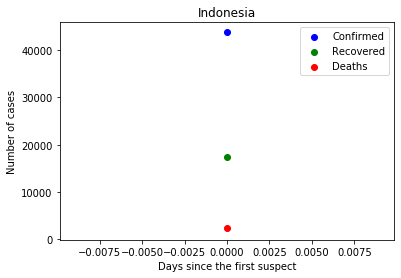

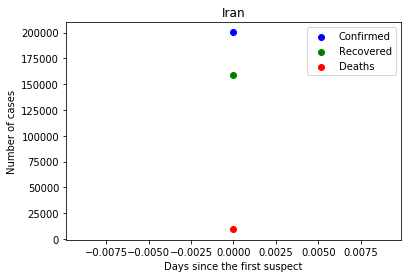

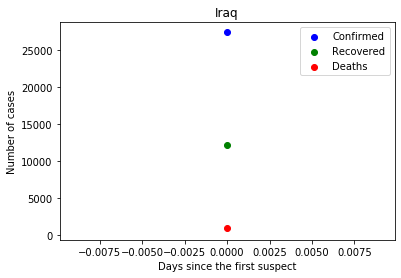

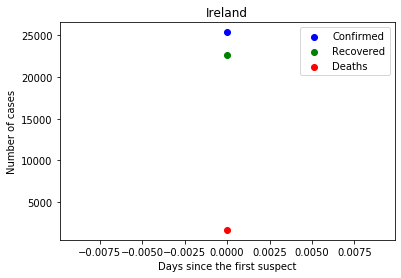

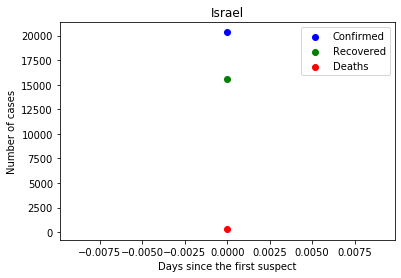

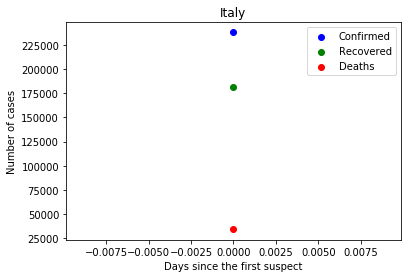

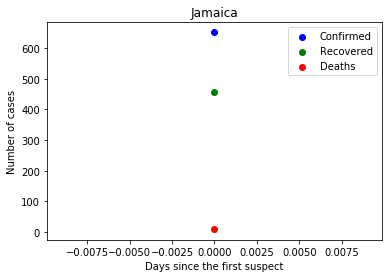

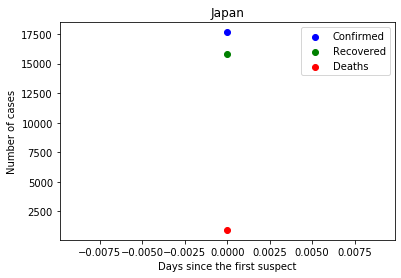

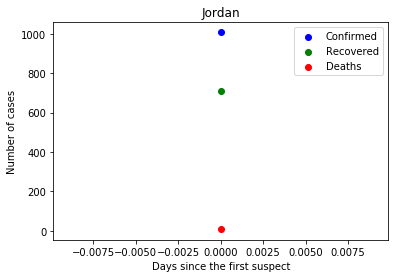

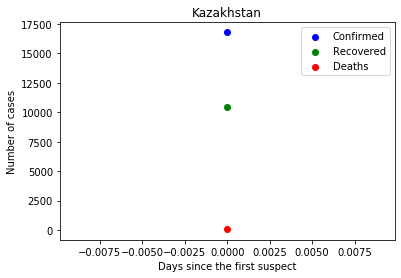

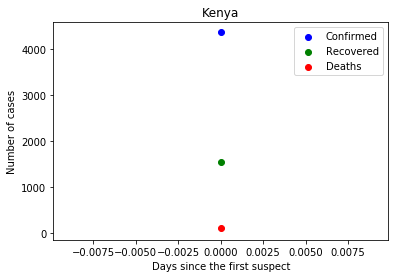

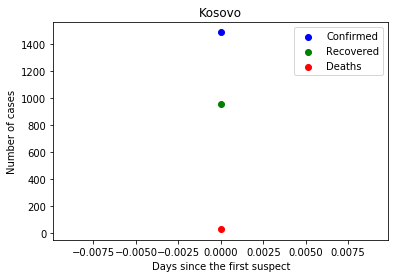

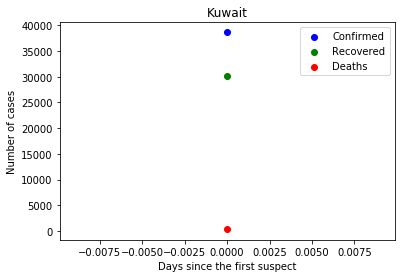

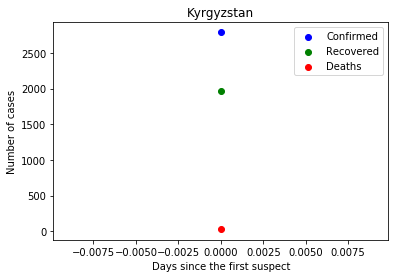

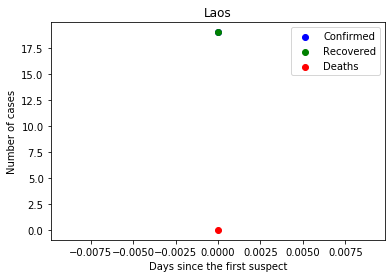

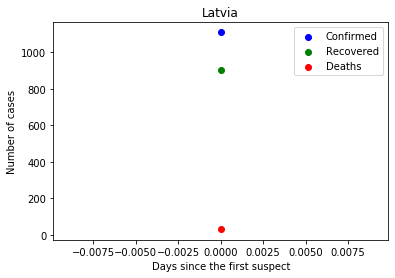

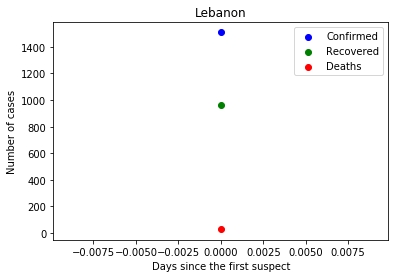

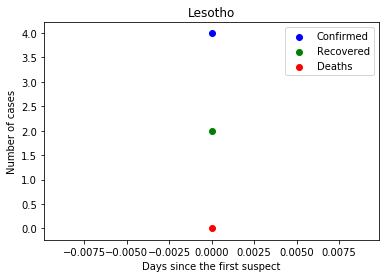

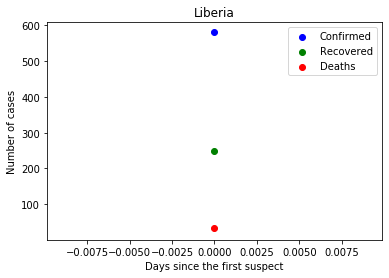

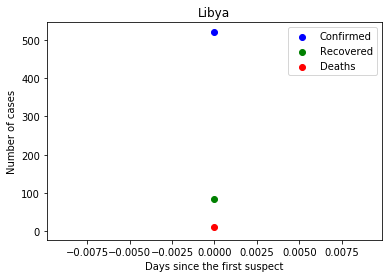

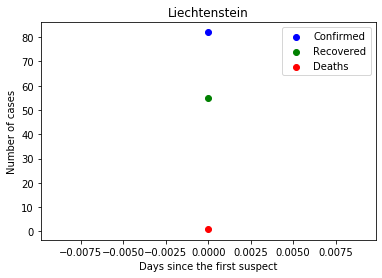

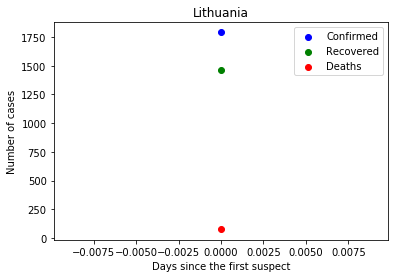

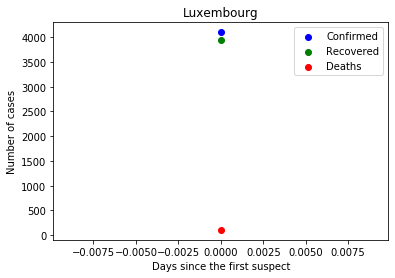

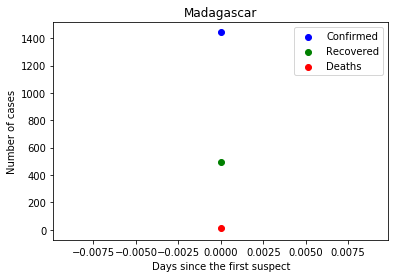

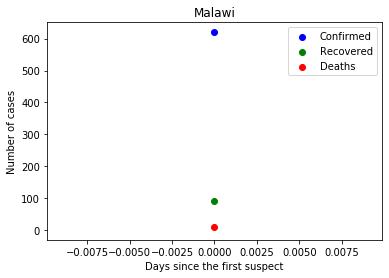

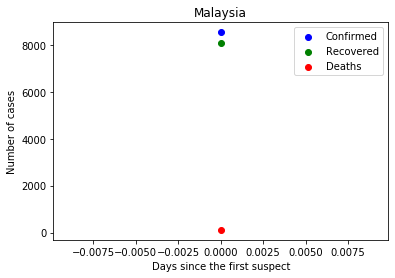

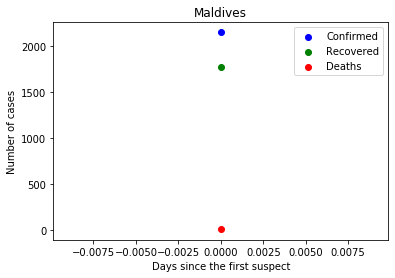

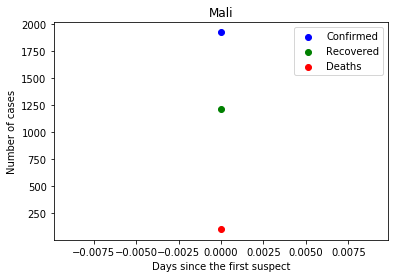

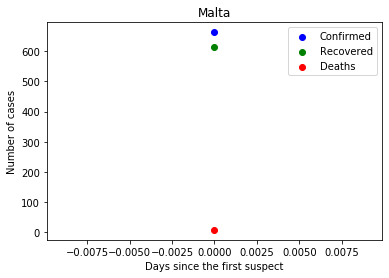

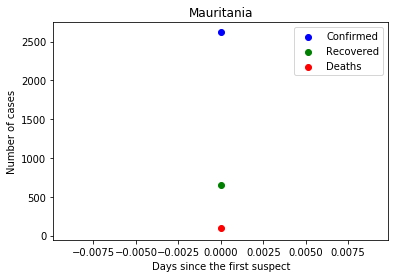

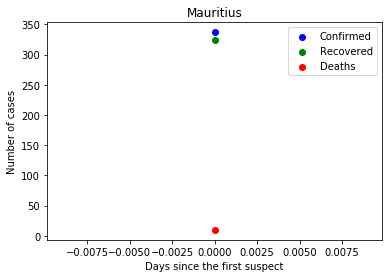

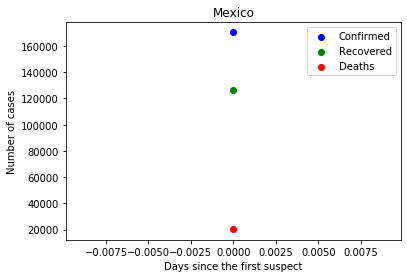

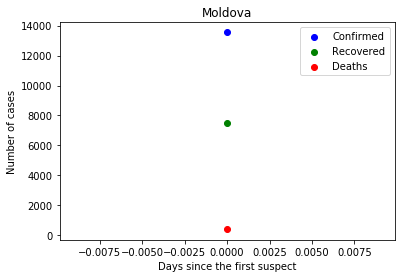

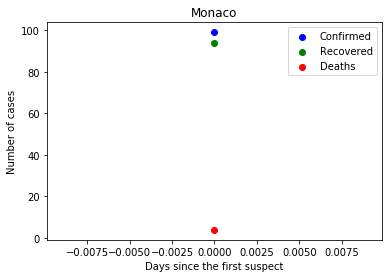

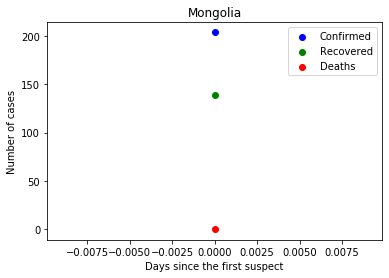

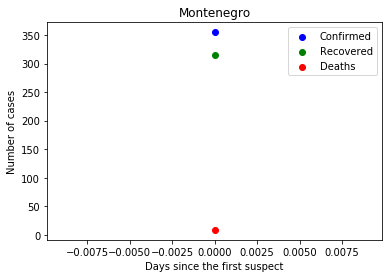

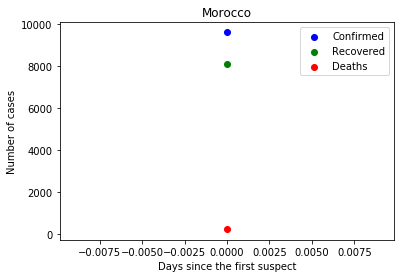

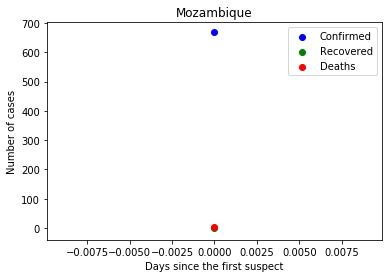

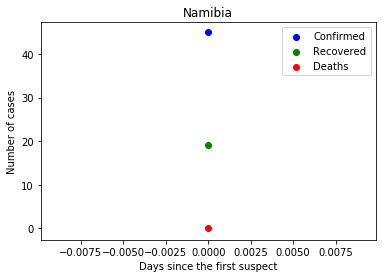

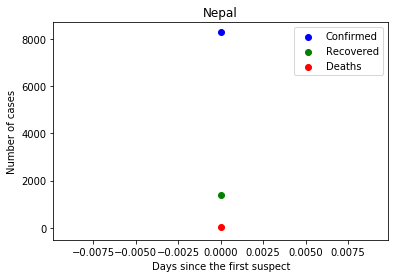

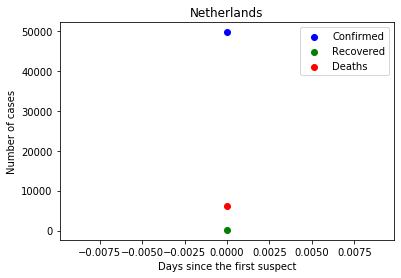

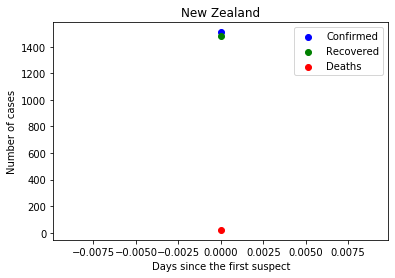

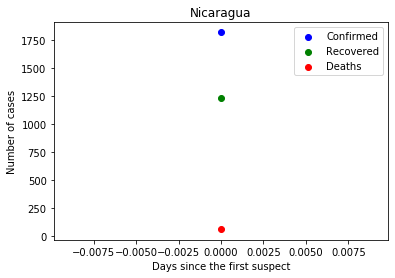

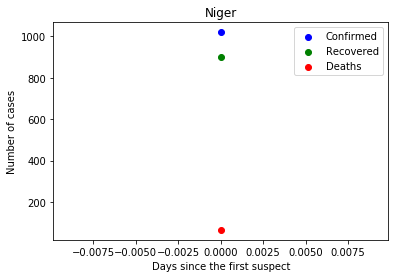

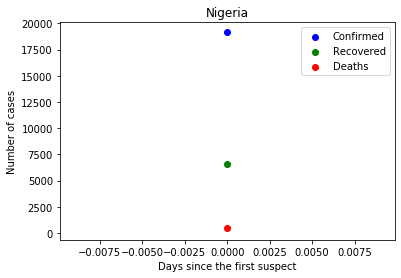

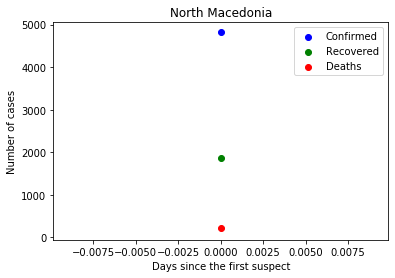

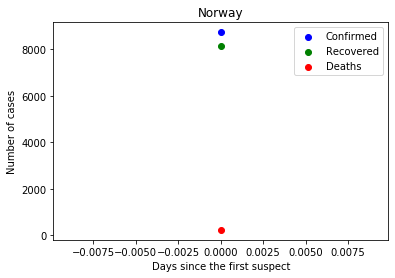

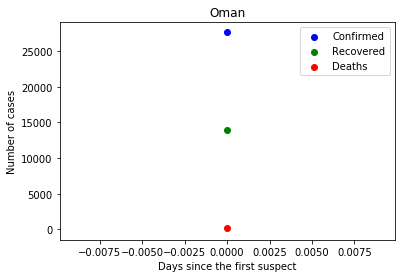

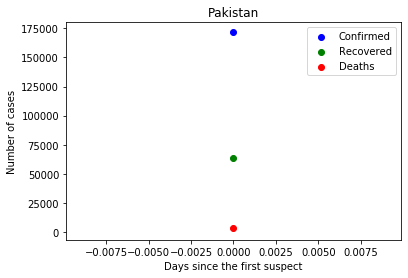

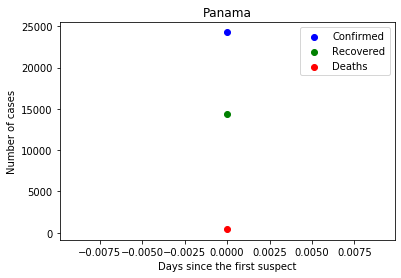

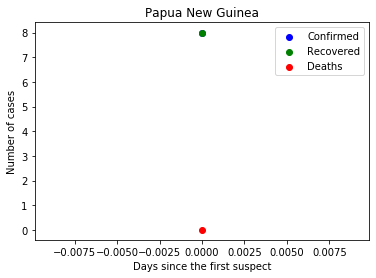

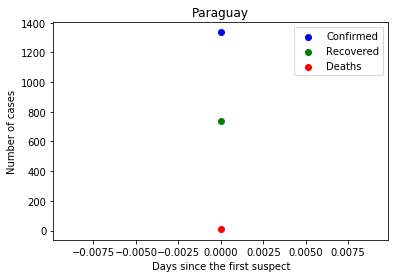

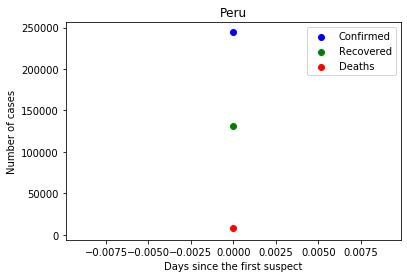

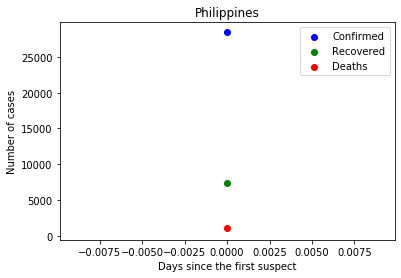

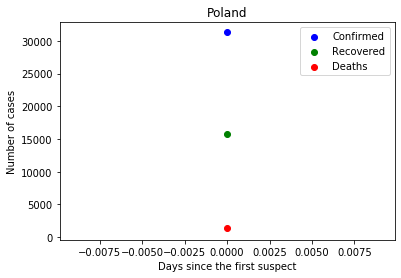

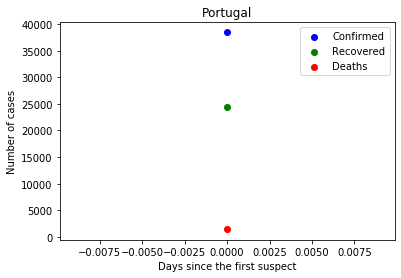

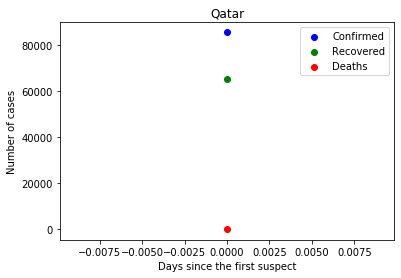

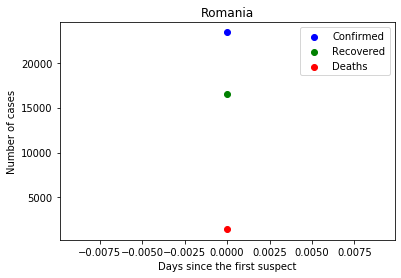

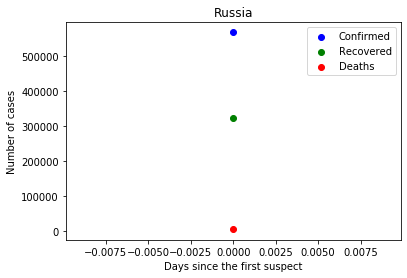

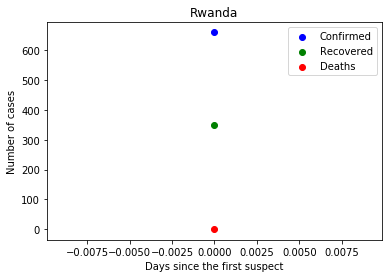

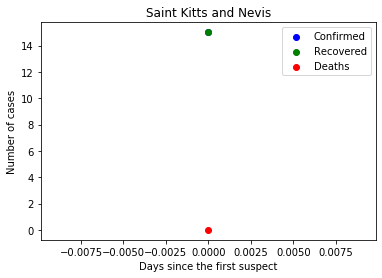

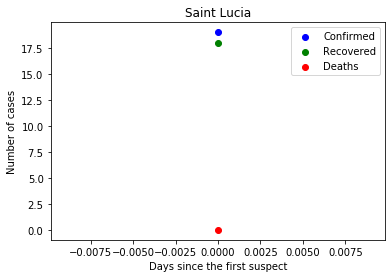

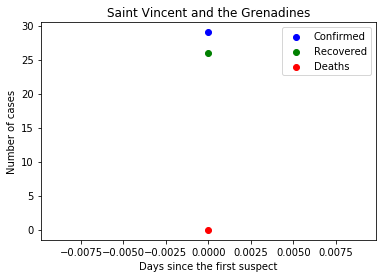

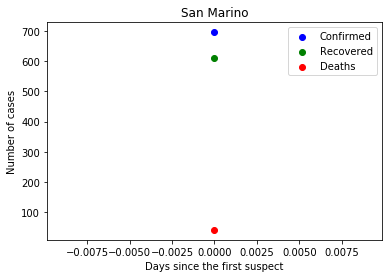

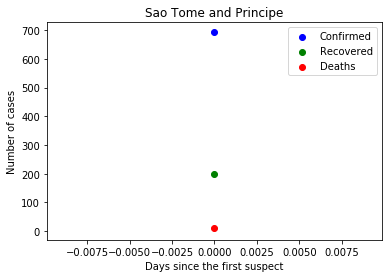

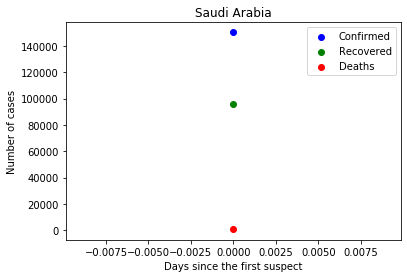

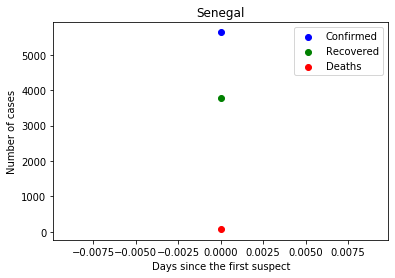

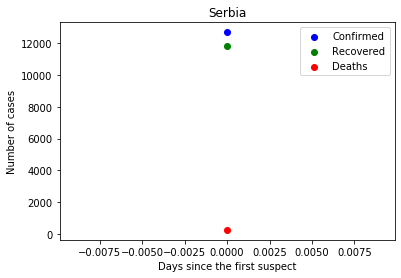

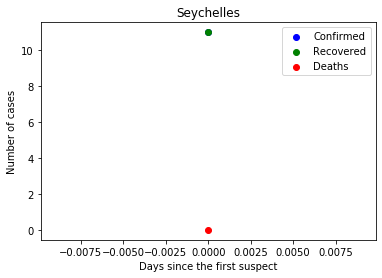

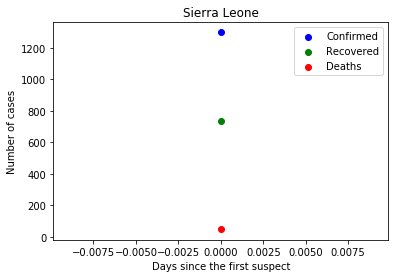

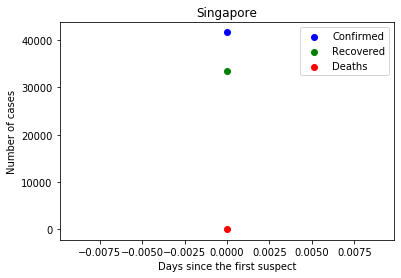

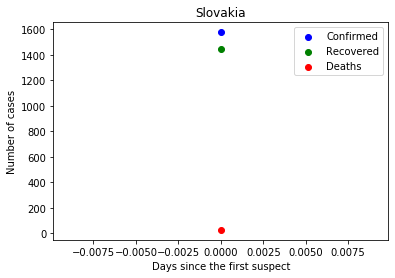

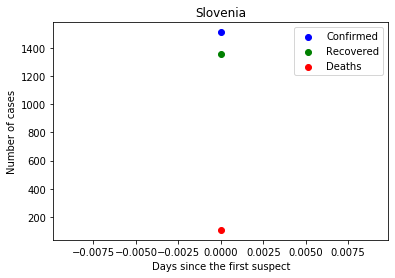

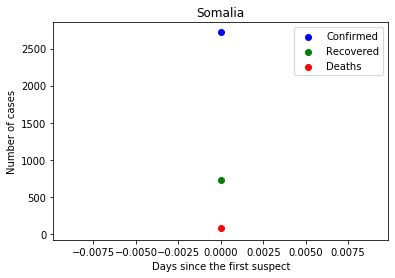

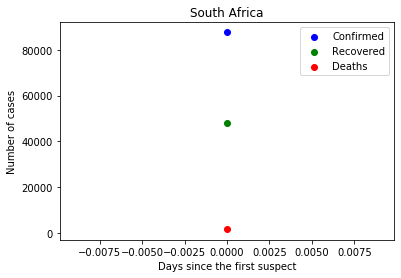

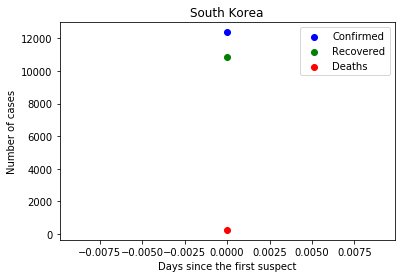

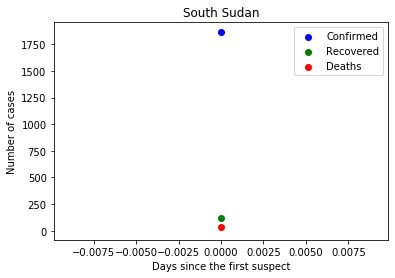

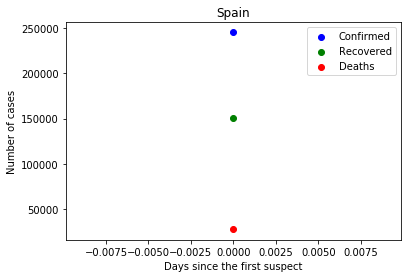

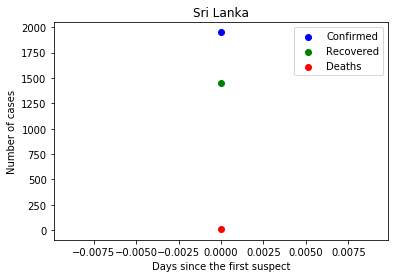

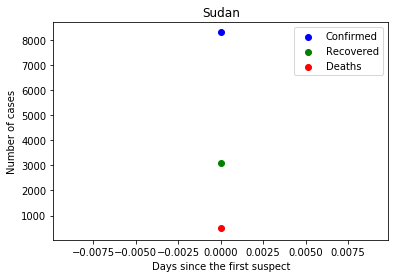

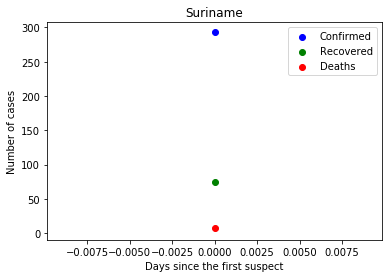

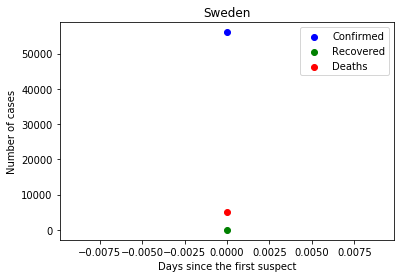

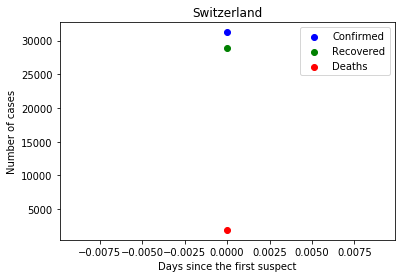

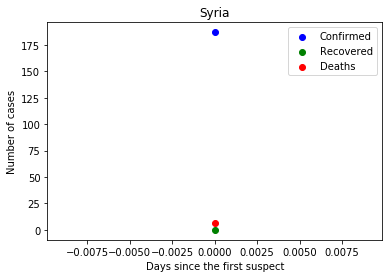

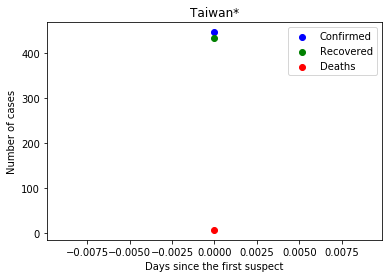

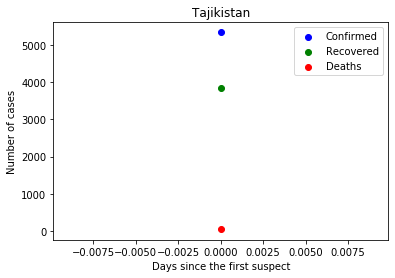

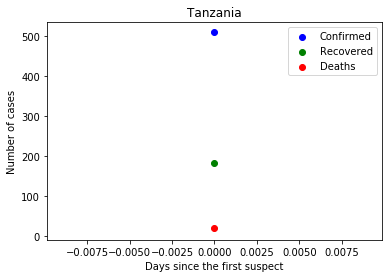

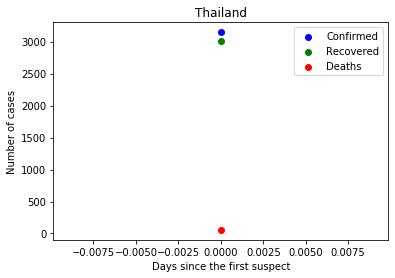

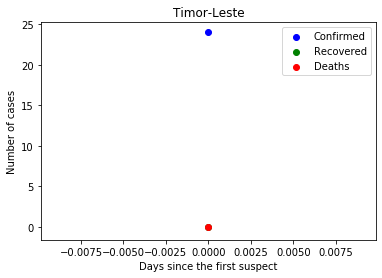

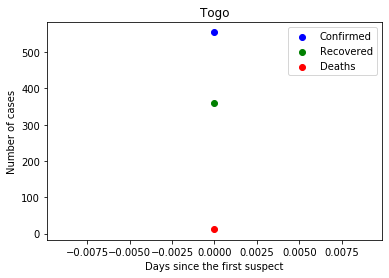

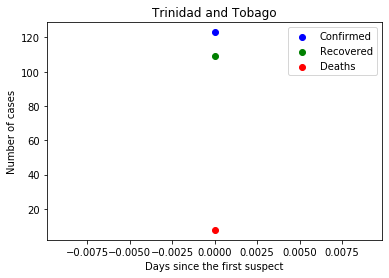

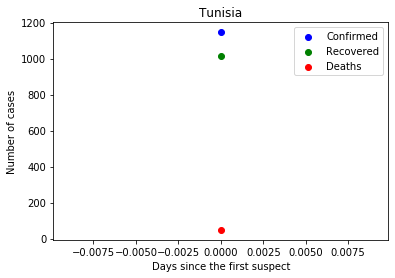

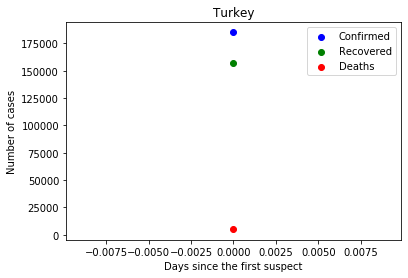

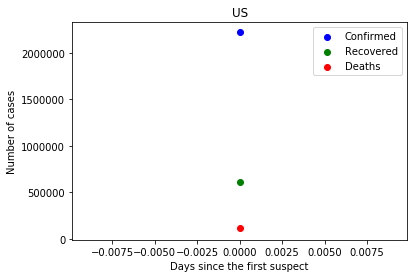

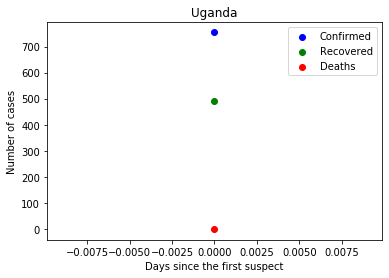

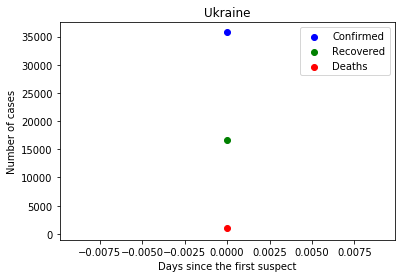

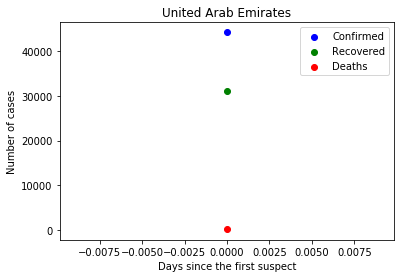

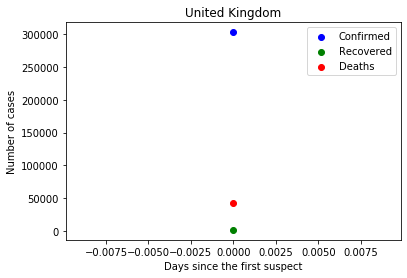

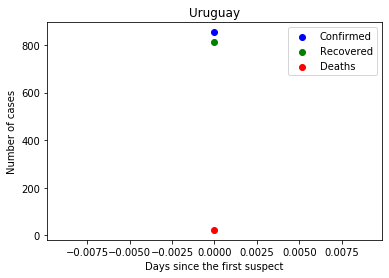

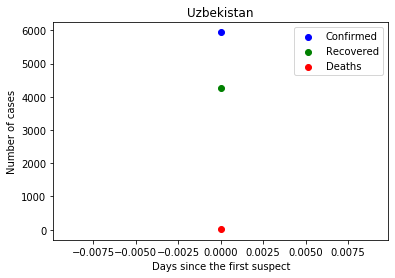

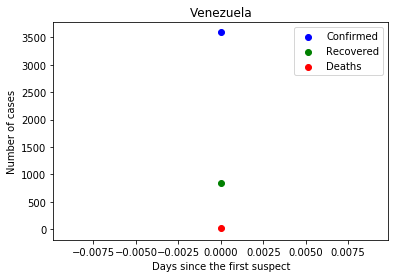

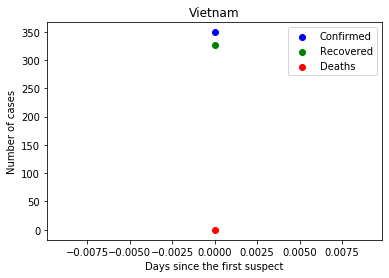

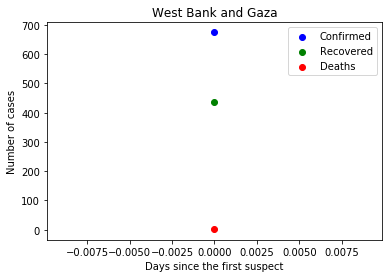

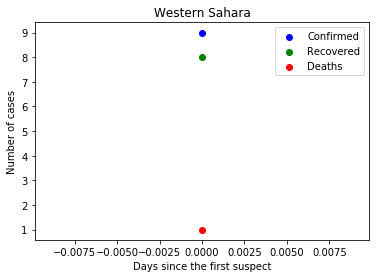

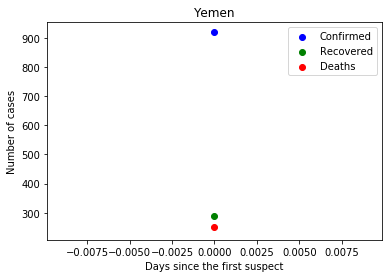

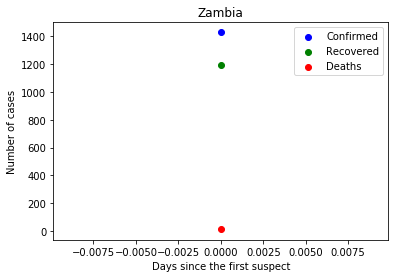

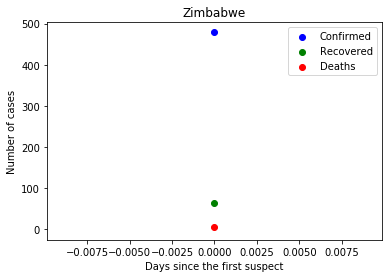

In [46]:
for idx in range(0,len(countries)):    
    C = df3[df3['Country']==countries[idx]].reset_index()        
    plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
    plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
    plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
    plt.title(countries[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()    

In [47]:
df4 = df3.groupby(['Country'])[['Country','Confirmed','Deaths','Recovered']].sum().reset_index()

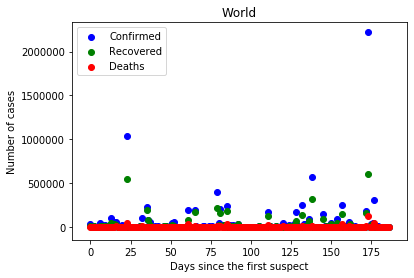

In [35]:
C = df4
plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
plt.title('World')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()